# Метрики классификации

Чтобы создать эффективное решение, важно сначала определить, что мы понимаем под «качеством». Для сравнения различных подходов и выбора лучшего из них необходимо понимать, как правильно измерять их эффективность, и для этого нам нужны соответствующие метрики.

## Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является  accuracy — доля правильных ответов алгоритма.

$$ \large \text{Accuracy} = \frac{P}{N}, $$

где $P$ — количество верно предсказанных классов,

$\quad\  N$ — общее количество тестовых примеров.

**Недостатки метрики accuracy:**

* **Несбалансированные классы.** Accuracy нельзя использовать, если данные не сбалансированы, то есть в одном из классов больше представителей, чем в другом.
На рисунке ниже мы видим, что при явном количественном преобладании объектов класса airplane модель может классифицировать все объекты как airplane и при этом получить такую же точность, как модель, которая качественно разделяет все 3 класса, так как количество ошибок будет равно числу объектов классов, в которых меньше представителей (в данном случае в классах automobile и bird по 10 представителей, соответственно, 20 ошибок).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/problem_of_simple_way_to_compute_accuracy.png" width="500" ></center>

* **Не различает типы ошибок.** Accuracy не учитывает, насколько критичны разные виды ошибок. Ошибки классификации бывают двух видов: **ошибка I-го рода** и **ошибка II-го рода**. Рассмотрим пример теста на беременность. Если женщина действительно беременна, то она принадлежит к классу с меткой 1, иначе — имеет метку 0. Пусть тест на беременность выполняет роль классификатора: показывает беременность (т.е. метку 1) или отсутствие беременности (метку 0).

    Таким образом, решающее значение имеет то, какую ошибку выдает классификатор, потому что результат предсказания имеет разные последствия. Например, "не беременна, но тест положительный" соответствует ошибке I-го рода, а "беременна, но тест отрицательный" – ошибке II-го рода.


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/1_2_errors.png" width="400" ></center>

## Confusion matrix

Попробуем решить эту проблему. Для этого сначала введём важную концепцию в терминах ошибок классификации — **confusion matrix** (матрицу ошибок). Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта к одному из классов. Тогда матрица ошибок классификации будет выглядеть следующим образом:


<center><img src="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/conf_matrix.png" width = "600"></a></center>

Матрица ошибок имеет следующие обозначения:

* **True Positive (TP):** количество правильных предсказаний для положительного класса.

* **True Negative (TN):** количество правильных предсказаний для отрицательного класса.

* **False Positive (FP):** количество неправильных предсказаний, когда отрицательный класс предсказан как положительный.

* **False Negative (FN):** количество неправильных предсказаний, когда положительный класс предсказан как отрицательный.

*Как легко запомнить: True/False — это верное предсказание или нет. Positive/Negative — это какой класс предсказал классификатор. Например, True Positive — предсказание верное (True), классификатор предсказал положительный класс (Positive).*

Используя матрицу ошибок, можно рассчитать различные метрики качества классификации, такие как **accuracy**:


$$\large\text{Accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$


## Balanced accuracy

В случае дисбаланса классов можно посчитать метрику **balanced accuracy**. Она, в отличие от **accuracy**, учитывает дисбаланс классов:

$$\large\text{Balanced Accuracy} = \dfrac{1}{2} (\dfrac{TP}{TP + FN} + \dfrac{TN}{TN + FP})$$

Посмотрим на примере:

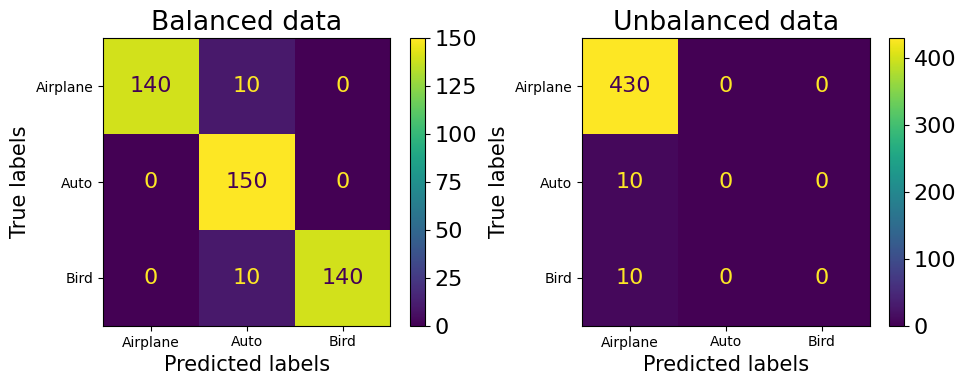

Accuracy for Balanced data   : 0.96
Accuracy for Unbalanced data : 0.96


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3.0)
plt.rcParams.update({"font.size": 16})
ax[0].set_title("Balanced data")
ax[1].set_title("Unbalanced data")

labels = ["Airplane", "Auto", "Bird"]

# Balanced data
air, auto, bird = 150, 150, 150
actual_b = np.array([0] * air + [1] * auto + [2] * bird)
predicted_b = np.array([0] * (air - 10) + [1] * (auto + 20) + [2] * (bird - 10))

# Unbalanced data
air, auto, bird = 430, 10, 10
actual_ub = np.array([0] * air + [1] * auto + [2] * bird)
predicted_ub = np.array([0] * (air + 20) + [1] * (auto - 10) + [2] * (bird - 10))

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(actual_b, predicted_b),
    display_labels=labels,
).plot(ax=ax[0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(actual_ub, predicted_ub),
    display_labels=labels,
).plot(ax=ax[1])

label_font = {"size": "15"}  # Adjust to fit
ax[0].set_xlabel("Predicted labels", fontdict=label_font)
ax[0].set_ylabel("True labels", fontdict=label_font)
ax[1].set_xlabel("Predicted labels", fontdict=label_font)
ax[1].set_ylabel("True labels", fontdict=label_font)

plt.show()

print(
    f"Accuracy for Balanced data   : {metrics.accuracy_score(actual_b, predicted_b):.2f}"
)
print(
    f"Accuracy for Unbalanced data : {metrics.accuracy_score(actual_ub, predicted_ub):.2f}"
)

In [ ]:
print(
    f"Balanced accuracy for Balanced data   : {metrics.balanced_accuracy_score(actual_b, predicted_b):.2f}"
)
print(
    f"Balanced accuracy for Unbalanced data : {metrics.balanced_accuracy_score(actual_ub, predicted_ub):.2f}"
)

Balanced accuracy for Balanced data   : 0.96
Balanced accuracy for Unbalanced data : 0.33


## Precision, Recall



Для того, чтобы описать, как качественно алгоритм определяет метку объекта на каждом из классов и как много объектов из имеющихся находит, вводятся метрики **precision (точность)** и **recall (полнота)**.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/precision-recall.png" width="650" ></center>

$$\large \text{Precision} = \dfrac{TP}{TP + FP}, \quad \text{Recall} = \dfrac{TP}{TP + FN}$$

**Именно** введение **precision** не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. **Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.**

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = [0, 1, 0, 0, 1, 1]
y_pred = [0, 1, 1, 1, 0, 1]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.500
Recall: 0.667


## F-мера

Часто в реальной практике стоит задача найти **оптимальный** **баланс** между **Presicion и Recall**.

Для этого вводится **$F_\beta$-мера**:

$$\large F_\beta = (1 + \beta^2) \cdot \dfrac{\text{precision} \cdot \text{recall}}{(\beta^2 \cdot \text{precision}) + \text{recall}}$$

$\beta$ в данном случае определяет относительное влияние precision и recall в метрике.



При $\beta = 1$ $F_\beta$-мера — это среднее гармоническое между Presicion и Recall.

$$\large F_1 = \dfrac{2\cdot\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

F-мера достигает максимума, когда полнота и точность равны единице, и близка к нулю, если один из аргументов близок к нулю.

Более наглядно: низкие значения точности не позволяют метрике $F_1$ вырасти.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/f1_lines.png" width="700"></center>

<center><em>Зависимость F1-меры от полноты при фиксированной точности. При точности 10% F1-мера не может быть больше 20%.</em></center>


В Sklearn есть удобная функция `sklearn.metrics.classification_report`, возвращающая recall, precision и F1-меру для каждого из классов, а также количество экземпляров каждого класса.

In [ ]:
from sklearn.metrics import classification_report


target_names = ["class 0", "class 1"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.33      0.40         3
     class 1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



## AUC-ROC

Пусть решается задача **бинарной классификации**, и необходимо оценить качество классификатора.

В общем случае **классификатор выдаёт предсказания** не в виде "0" и "1", а **в виде вероятности принадлежности к классу "1" в промежутке между 0 и 1**.

Для того, чтобы рассчитать все метрики, которые мы рассмотрели выше, требуется бинаризовать предсказания модели по некоторому порогу и построить confusion matrix.

Стандартный порог = 0.5. Если вероятность больше порогового значения, объект считается принадлежащим к классу 1, если меньше&nbsp;— к классу 0.
Однако порог можно выставить и другой. Для того, чтобы оценить качество модели, не выбирая конкретный порог, можно построить **ROC-кривую**.


### Определение

[[wiki] 📚 ROC-кривая (Receiver Operating Characteristic curve)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) — это график изменения True Positive Rate (TPR) против изменения False Positive Rate (FPR) при переборе всех значений порога классификации.

$\text{TPR}$ и $\text{FPR}$ вычисляются по по следующим формулам:

$$\large \text{TPR} = \dfrac{TP}{TP + FN}, \quad \text{FPR} = \dfrac{FP}{FP + TN}$$

**Площадь под ROC-кривой** (AUC-ROC, Area Under the ROC Curve) является численной характеристикой качества классификатора.

**AUC-ROC является одной из немногих метрик, позволяющих оценить качество классификатора без необходимости подбора конкретного порога.**

[[demo] 🎮 Интерактивная визуализация](http://navan.name/roc/) влияния порога на разделение двух классов

### Построение

Рассмотрим на примере. У нас есть таблица с предсказаниями модели (оценка уверенности в классе 1) и истинной разметкой классов. Отсортируем значения по убыванию оценки от модели.
Если классификатор хорошо справляется с задачей, то вверху будет много единиц, а внизу — много нулей. Если классификатор неудачный — случайное распределение меток $0$ и $1$.

<center><img src="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/roc_auc_data_example.png" width="600"/></center>

Приступим непосредственно к изображению графика ROC-кривой. Начнём с квадрата единичной площади и изобразим на нём прямоугольную координатную сетку, равномерно нанеся $m$ горизонтальных линий и $n$ вертикальных. Число горизонтальных линий $m$ соответствует количеству объектов класса $1$ из рассматриваемой выборки, а число $n$ — количеству объектов класса $0$. В нашем примере $m=3$ и $n=4$. Таким образом, квадрат единичной площади разбился на 12 ($m \times n$) прямоугольных блоков.

Начиная из точки $(0, 0)$, построим ломаную линию в точку $(1, 1)$ по узлам получившейся решетки по следующему алгоритму, пройдя по строкам таблицы 2 сверху вниз:
- **оценка** алгоритма для объекта из текущей строки не равна оценке для объекта из следующей:
 - если класс $1$, рисуем линию до следующего узла вертикально вверх
 - если класс $0$, рисуем линию до следующего узла горизонтально направо
- оценки для объектов в нескольких последующих строках совпадают:
 - нарисовать линию из текущего узла в узел, располагающийся на $k$ углов вертикально выше и на $l$ узлов левее. $k$ и $l$ соответственно равны количеству объектов класса $1$ и $0$ среди группы повторяющихся оценок классификатора

<center><img src="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/make_roc_curve.png" width="500"/></center>

<center><em>Рис.1. Построение ROC-кривой</em></center>

**Линия справа** на рис. 1 и есть **ROC-кривая**. Вычислим площадь под получившийся кривой — **AUC-ROC**. AUC-ROC $= 9.5 / 12 \sim 0.79$.


Так как мы начали свое построение с квадрата единичной площади, то AUC-ROC может принимать значения в $[0,1]$.

1. ROC-кривая абсолютно точного бинарного классификатора имеет вид единичного квадрата, его AUC-ROC = 1.

2. Если классификатор для всех объектов предскажет одно и то же значение, то его AUC-ROC = 0.5

3. ROC-кривая для всегда ошибающегося бинарного классификатора, в этом случае AUC-ROC = 0.



<center><img src="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/various_roc_curves.png" width="500"/></center>

<center><em>Рис. 2. ROC-кривые для наилучшего (AUC=1), константного (AUC=0.5) и наихудшего (AUC=0) алгоритма</em></center>


Сгенерируем датасет для демонстрации:

In [ ]:
import pandas as pd

np.random.seed(42)
n_samples = 100
y_true = np.random.randint(0, 2, size=n_samples)  # true labels (0 or 1)

# Generate proba
y_score = 0.3 * y_true + 0.7 * np.random.rand(n_samples)

data = pd.DataFrame({"y_true": y_true, "y_scores": y_score})

data.head(5)

,y_true,y_scores
0,0,0.678709
1,1,0.842593
2,0,0.657649
3,0,0.626379
4,0,0.418530


Построим ROC-кривую в коде и отобразим ее, а также посчитаем AUC-ROC.

Построить ROC-кривую можно с помощью функции `sklearn.metrics.roc_curve` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html). Она принимает на вход:
* массив истинных меток классов `y_true`,
* массив оценок вероятностей `y_score`.

И возвращает:

* массив значений FPR,
* массив значений TPR,
* массив перебранных порогов.

Посчитать AUC-ROC можно с помощью функции `sklearn.metrics.roc_auc_score` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). Она принимает на вход массивы `y_true` и `y_score` и возвращает значение AUC-ROC.

ROC AUC: 0.84


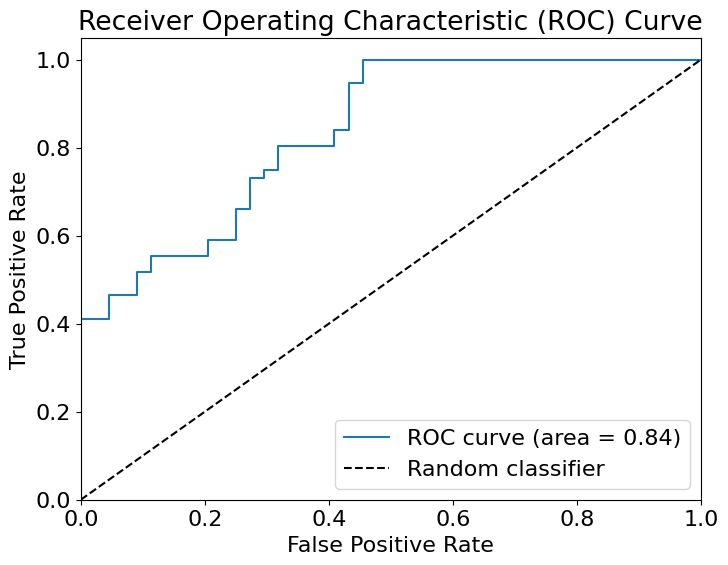

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_true, y_score)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Посмотрим на значения нагляднее, где $\text{TPR}, \text{FPR}$ для каждого порога:

In [ ]:
df_tmp = pd.DataFrame({"FPR": fpr[1:], "TPR": tpr[1:], "thresholds": thresholds[1:]})

df_tmp.head(10)

,FPR,TPR,thresholds
0,0.000000,0.017857,0.980247
1,0.000000,0.410714,0.692894
2,0.045455,0.410714,0.678709
3,0.045455,0.464286,0.663153
4,0.090909,0.464286,0.657649
5,0.090909,0.517857,0.651875
6,0.113636,0.517857,0.650788
7,0.113636,0.553571,0.645657
8,0.204545,0.553571,0.604172
9,0.204545,0.589286,0.587268


## PR-кривая

PR-кривая (Precision-Recall Curve) – графическое представление взаимосвязи между precision и recall модели при различных порогах классификации.

PR-кривую можно построить с помощью функции `sklearn.metrics.precision_recall_curve` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).

Она принимает на вход массивы `y_true` и  `y_score` и возвращает массивы значений Precision, Recall и перебранных порогов.





PR AUC: 0.87


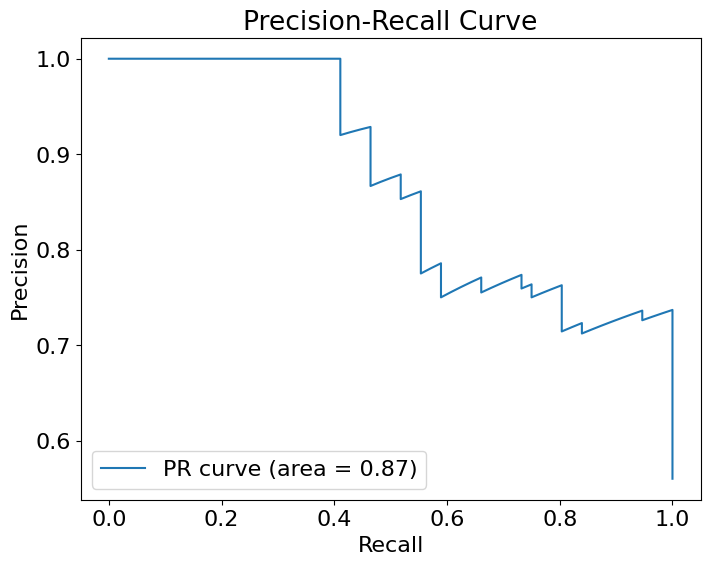

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_score)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR curve (area = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

На графике PR-кривой видно, что при фиксированном значении recall существуют значения порога, которые обеспечивают наилучшее значение precision.

## Multiclass accuracy

В случае многоклассовой классификации термины $\text{TP, FP, TN, FN}$ считаются для каждого класса:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/out/confmatrix.png" width="700"></center>

In [ ]:
np.random.seed(42)
y_pred = np.random.randint(4, size=(200,))
y_true = np.random.randint(4, size=(200,))

label_names = ["label A", "label B", "label C", "label D"]

print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

     label A       0.26      0.24      0.25        49
     label B       0.20      0.23      0.21        40
     label C       0.31      0.34      0.33        50
     label D       0.28      0.25      0.26        61

    accuracy                           0.27       200
   macro avg       0.26      0.26      0.26       200
weighted avg       0.27      0.27      0.27       200



В случае многоклассовой классификации есть различные способы усреднения результатов, рассмотрим их подробнее на примере расчета метрики $\text{Precision}$:
1. **Micro-усреднение**

Сначала объединяем все истинные положительные $\text{(TP)}$, ложные положительные $\text{(FP)}$ значения по всем классам, а затем считаем метрику на этой общей сумме.

Предположим, у нас есть три класса:

$$\text{Класс A: TP = 10, FP = 3}$$

$$\text{Класс B: TP = 15, FP = 8}$$

$$\text{Класс C: TP = 12, FP = 2}$$

Общая точность по micro будет считаться как сумма всех $\text{TP и FP}$:

$$\text{TP = 10 + 15 + 12 = 37}$$


$$\text{FP = 3 + 8 + 2 = 13}$$

$$\text{Micro-Precision = }{\frac{37}{37+13}\approx 0.74}$$

2. **Macro-усреднение**

Сначала рассчитываются метрики отдельно для каждого класса, затем берётся среднее арифметическое.

Те же данные, теперь считаем точность для каждого класса отдельно:

$$\text{Precision}_{A} = \frac{10}{10+3}\approx 0.769$$

$$\text{Precision}_{B} = \frac{15}{15+8}\approx 0.652$$

$$\text{Precision}_{C} = \frac{12}{12+2}\approx 0.857$$

$$\text{Macro-Precision} = \frac{0.769 + 0.652 + 0.857}{3}\approx 0.759$$

3. **Weighted-усреднение**

Классы взвешиваются в зависимости от их размера (количества объектов).

Если класс $\text{A}$ имеет $\text{100}$ объектов, $\text{B – 200, C – 50:}$

$$\text{Precision}_{A} = 0.769 × 100 = 76.9$$

$$\text{Precision}_{B} = 0.652 × 200 = 130.4$$

$$\text{Precision}_{C} = 0.857 × 50 = 42.85$$

$$\text{Weighted-Precision} = \frac{76.9 + 130.4 + 42.85}{100 + 200 + 50} \approx 0.715$$

**Важно!** Обращайте внимание, какое усреднение используется при расчете метрик для многоклассовой классификации.

## Multilabel

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L01/three_types_of_classification_tasks.jpg" width="650"></center>

<center><em>Source: <a href="https://thinkpalm.com/blogs/top-machine-learning-algorithms-for-business-applications-in-2023/">Top Machine Learning Algorithms For Business Applications In 2023</a></em></center>

Cлучай, когда объект может принадлежать одновременно нескольким классам, называется *multilabel* (многозначная) классификация. Такую задачу не стоит сводить к задаче бинарной классификации по каждому классу, так как метки могут быть не независимыми.

Допустим, у нас есть 3 объекта, и модель предсказала нам 3 набора меток.

In [ ]:
# fmt: off
y_true = [[0,1,1,1],
         [0,0,1,0],
         [1,1,0,0]]

y_pred = [[0,1,0,1],
          [0,1,1,1],
          [1,0,1,1]]
# fmt: on


**Confusion Matrix**

Специальная функция, которая создаст 4 матрицы, по одной на каждый класс.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_true, y_pred)

array([[[2, 0],
        [0, 1]],

       [[0, 1],
        [1, 1]],

       [[0, 1],
        [1, 1]],

       [[0, 2],
        [0, 1]]])

А также есть еще один способ усреднения:

4. **Samples-усреднение**

Допустим, у нас есть три образца, и для каждого образца предсказания делаются по нескольким классам. Например:

- **Объект 1**: Истинные метки $\text{[1, 0, 1]}$, предсказанные метки $\text{[1, 0, 1]}$
- **Объект 2**: Истинные метки $\text{[0, 1, 0]}$, предсказанные метки $\text{[0, 0, 0]}$
- **Объект 3**: Истинные метки $\text{[1, 1, 1]}$, предсказанные метки $\text{[1, 1, 0]}$

Рассчитаем $\text{Precision}$ для каждого образца:

* **Образец 1**:
    - Истинные метки: $\text{[1, 0, 1]}$
    - Предсказанные метки: $\text{[1, 0, 1]}$
    - Здесь $\(\text{TP} = 2\)$ и $\(\text{FP} = 0\)$
    - $\text{Precision} = \dfrac{2}{2 + 0} = 1.0\$

* **Образец 2**:
    - Истинные метки: $\text{[0, 1, 0]}$
    - Предсказанные метки: $\text{[0, 0, 0]}$
    - Здесь $\(\text{TP} = 0\)$ и $\(\text{FP} = 0\)$
    - $\text{Precision} = 0$ (не определён, но считается как 0, если нет предсказаний)

* **Образец 3**:
    - Истинные метки: $\text{[1, 1, 1]}$
    - Предсказанные метки: $\text{[1, 1, 0]}$
    - Здесь $\(\text{TP} = 2\)$ и $\(\text{FP} = 0\)$
    - $\text{Precision} = \dfrac{2}{2 + 0} = 1.0\$

Теперь мы усредняем $\text{Precision}$ для всех трёх образцов:

$$\text{Samples-Precision} = \frac{1.0 + 0.0 + 1.0}{3} \approx 0.67$$

В отличие от других методов усреднения (например, Micro или Macro), здесь мы фактически оцениваем предсказания для каждого образца, а затем усредняем результаты, что даёт более точное представление о модели в задаче многозначной классификации.

[[colab] 🥨 Блокнот на Kaggle с примерами расчётов Multilabel](https://www.kaggle.com/code/kmkarakaya/multi-label-model-evaluation)